## Дерево решений

Дерево принятия решений — это один из алгоритмов машинного обучения. Алгоритм основан на правиле: «Если <условие>, то <ожидаемый результат>». Дерево принятия решений состоит из «узлов» и «листьев», каждый узел делит множество решений в согласии с каким-либо условием, уточняя результат.

# Car Evaluation dataset

https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as slp
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz 
from sklearn import tree


warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('../common/car_evaluation.csv', header=None)
df. shape

(1728, 7)

In [13]:
col_list = ["buying", "maintenance", "doors", "persons", "luggage", "safety", "class"]
df.columns = col_list
df.head()

,buying,maintenance,doors,persons,luggage,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1728 non-null   object
 1   maintenance  1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   luggage      1728 non-null   object
 5   safety       1728 non-null   object
 6   class        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [15]:
df.isnull().sum()

buying         0
maintenance    0
doors          0
persons        0
luggage        0
safety         0
class          0
dtype: int64

### Test-train

In [16]:
X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((1157, 6), (571, 6))

### Encoding

In [17]:
encoder = slp.OrdinalEncoder()

col_list = ["buying", "maintenance", "doors", "persons", "luggage", "safety"]

X_train[col_list] = encoder.fit_transform(X_train[col_list])
X_test[col_list] = encoder.fit_transform(X_test[col_list])
X_train.head()

,buying,maintenance,doors,persons,luggage,safety
48,3.0,3.0,1.0,2.0,1.0,1.0
468,0.0,3.0,1.0,1.0,2.0,1.0
155,3.0,0.0,1.0,2.0,2.0,0.0
1721,1.0,1.0,3.0,2.0,2.0,0.0
1208,2.0,1.0,0.0,2.0,2.0,0.0


### heatmap

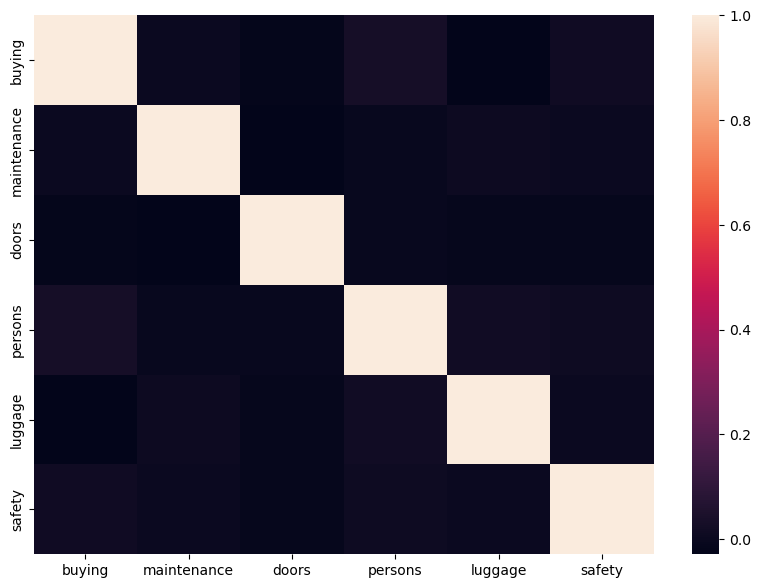

In [18]:
corr_matrix = X_train.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix)

### Модель

In [19]:
dtc = DecisionTreeClassifier(random_state=42, criterion='gini')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print('Basic accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Basic accuracy: 0.9667


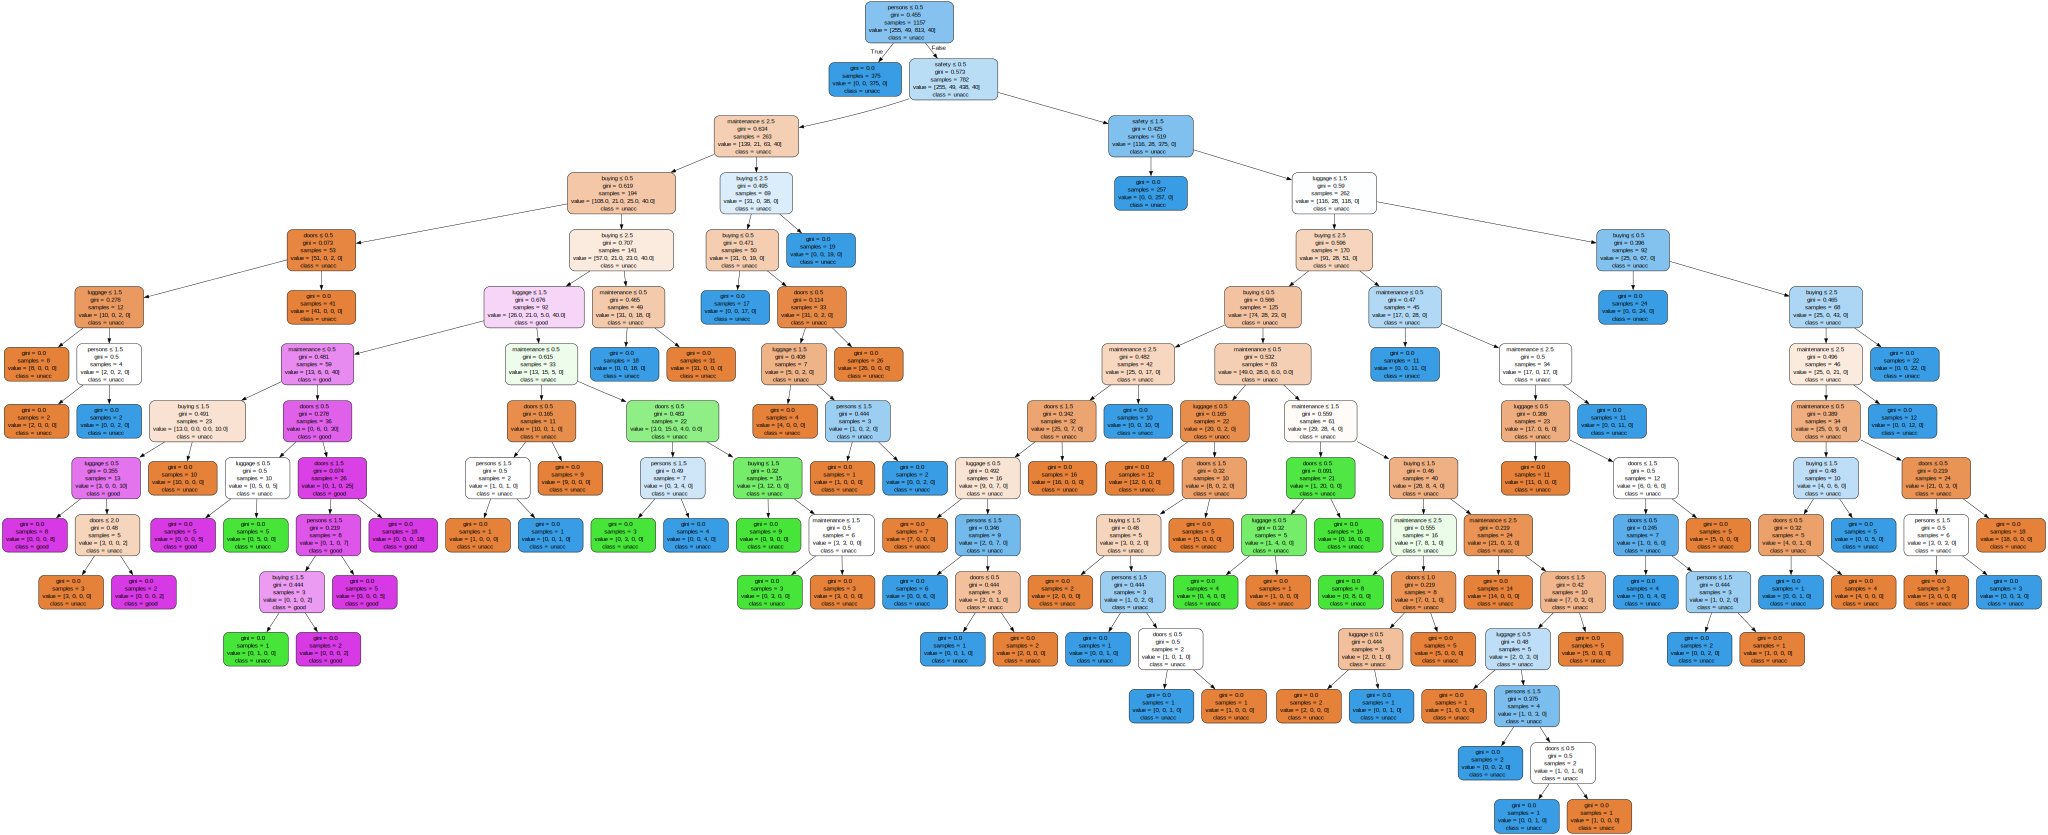

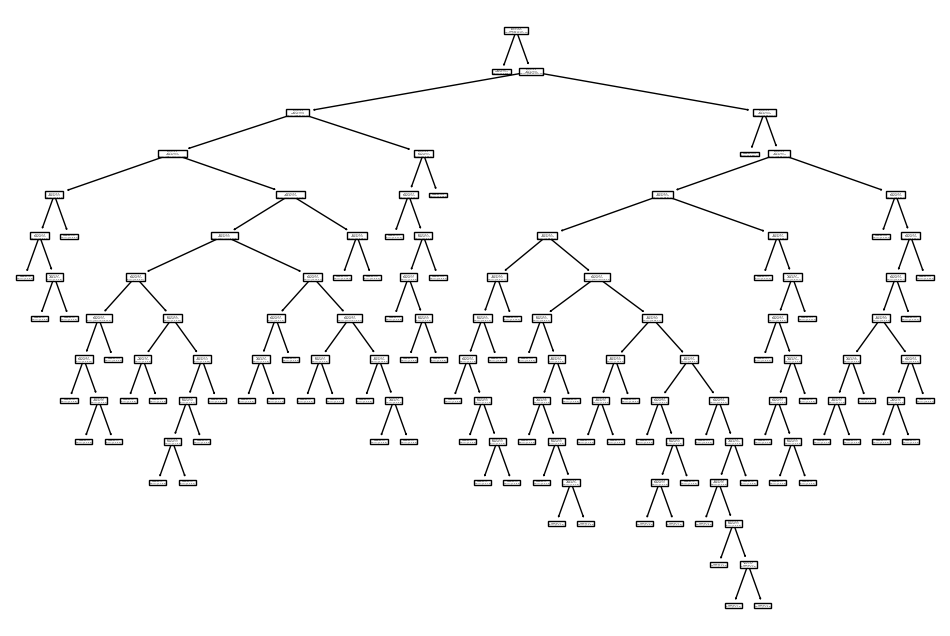

In [23]:
plt.figure(figsize=(12,8))
tree.plot_tree(dtc.fit(X_train, y_train)) 

dot_data = tree.export_graphviz(dtc, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

### criterion='entropy'

In [24]:
dtc = DecisionTreeClassifier(random_state=42, criterion='entropy')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print('Basic accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Basic accuracy: 0.9667


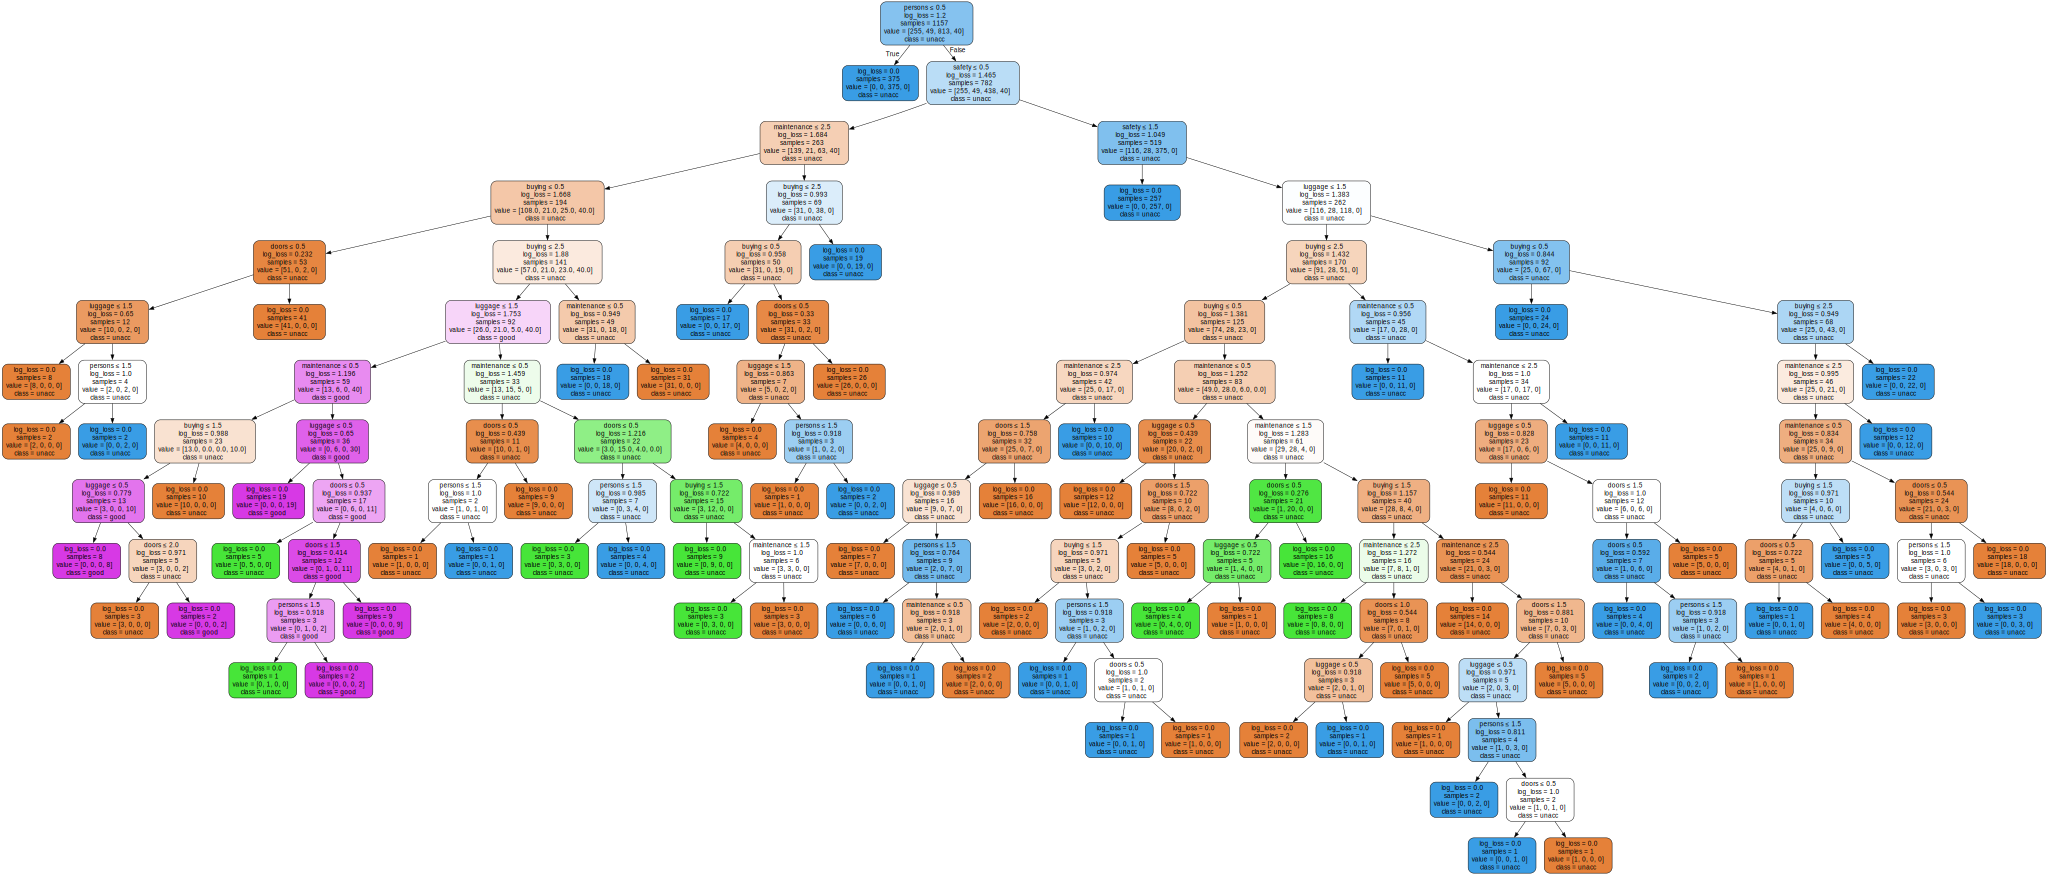

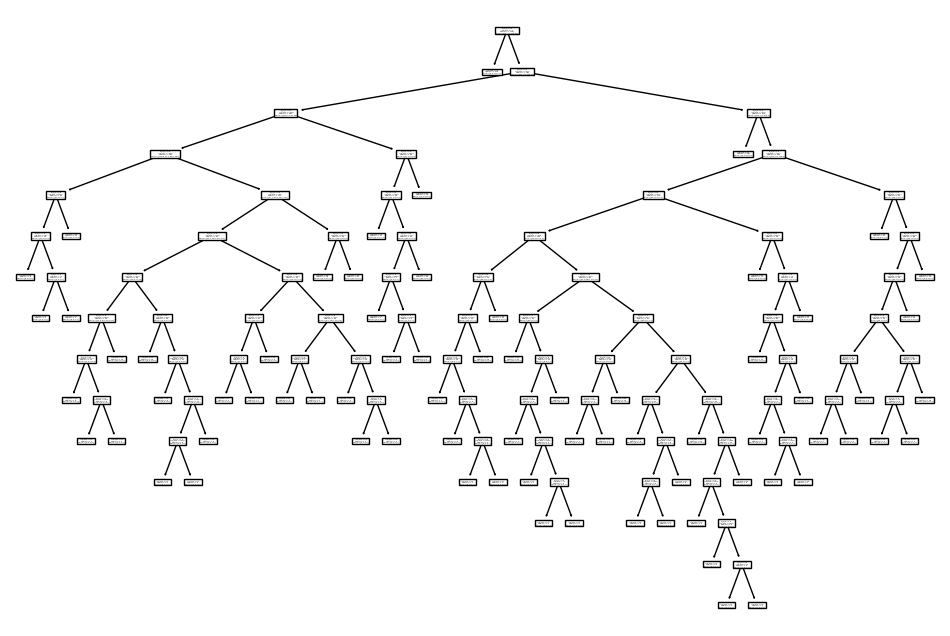

In [26]:
plt.figure(figsize=(12,8))
tree.plot_tree(dtc.fit(X_train, y_train)) 

dot_data = tree.export_graphviz(dtc, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

### criterion 'log_logs'

In [25]:
dtc = DecisionTreeClassifier(random_state=42, criterion='log_loss')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print('Basic accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Basic accuracy: 0.9667


### Confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[117   9   3   0]
 [  0  20   0   0]
 [  4   0 393   0]
 [  3   0   0  22]]


<Axes: >

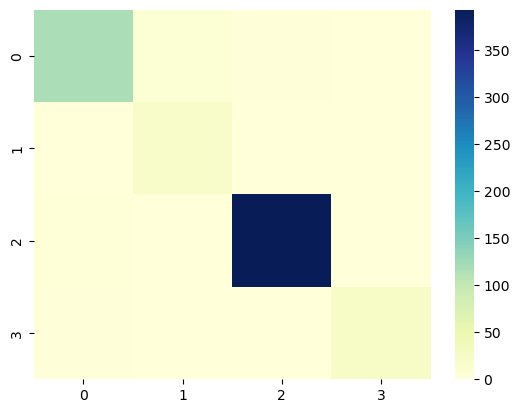

In [28]:
cm_matrix = pd.DataFrame(data=cm)

sns.heatmap(cm_matrix, cmap='YlGnBu')

### Графики

In [29]:
xdf = pd.DataFrame(X_test, columns=col_list)
xdf["Categories"] = y_pred

xdf.head()

,buying,maintenance,doors,persons,luggage,safety,Categories
599,0.0,0.0,2.0,0.0,1.0,0.0,unacc
1201,2.0,1.0,0.0,1.0,1.0,2.0,acc
628,0.0,0.0,3.0,0.0,0.0,2.0,unacc
1498,1.0,0.0,3.0,1.0,1.0,2.0,acc
1263,2.0,1.0,2.0,2.0,1.0,1.0,unacc


<Figure size 640x480 with 0 Axes>

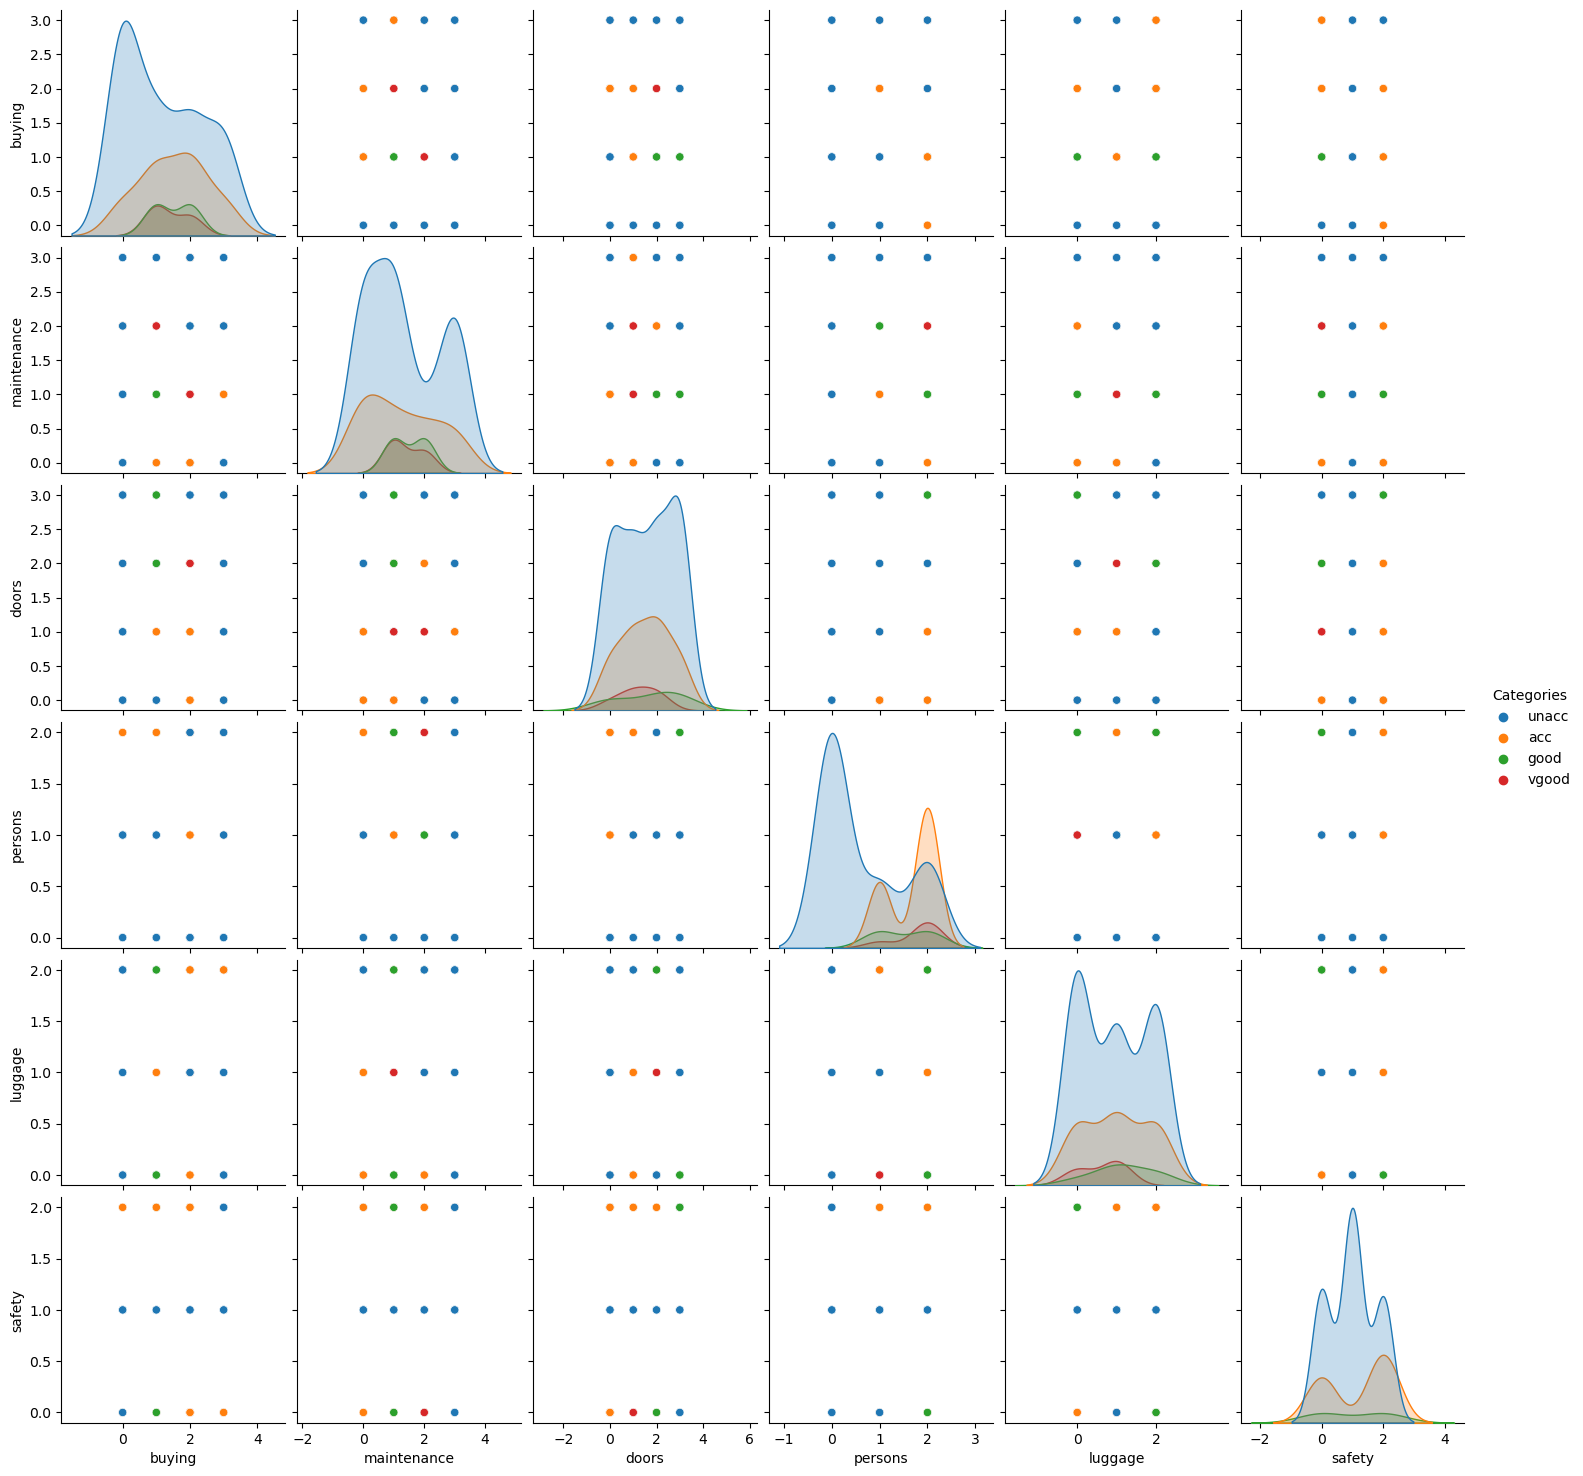

In [17]:
plt.figure()
sns.pairplot(xdf.dropna().head(100), hue = "Categories")
plt.show()